## Project Overview

This project analyzes employee-related data to identify the key factors that influence employee performance and build a predictive model that can estimate an employee’s performance rating based on various personal and professional attributes. The insights can be used by HR teams to enhance hiring decisions, employee engagement, and talent management strategies.

## Objectives of the Project

The main goals of this project are:

■ Department-wise Performance Analysis
    Evaluate how employees perform across different departments and identify high-performing and low-performing departments.
    
■ Identify Key Performance Drivers
    Determine the top factors that significantly impact employee performance using statistical correlations and machine learning feature importance.
    
■ Build a Predictive Model
    Train a machine learning model that can predict the performance rating of an employee based on:
    
        » demographic information
        » job-related attributes
        » satisfaction levels
        » experience and promotion history
This model can help HR during hiring or internal movements.

■ Provide Actionable Recommendations
    Based on the insights and model outputs, provide strategic recommendations to improve employee productivity and organizational efficiency.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
pip install xlrd

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [3]:
df=pd.read_excel("INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls")

In [4]:
df.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


## Dataset Description

1. The dataset includes 1,200 employees and 28 attributes, covering:
2. Demographics (Age, Gender, Education)
3. Job-related data (Department, Job Role, Job Level)
4. Satisfaction measures (Environment, Job, Work-Life Balance)
5. Experience details
6. Performance rating (Target variable)
7. The target column is: PerformanceRating

In [5]:
df["PerformanceRating"].value_counts()

PerformanceRating
3    874
2    194
4    132
Name: count, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

In [7]:
df.describe()

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
count,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,36.918333,9.165833,2.89250,2.715833,65.981667,2.731667,2.067500,2.732500,2.665000,15.222500,2.725000,11.330000,2.785833,2.744167,7.077500,4.291667,2.194167,4.105000,2.948333
std,9.087289,8.176636,1.04412,1.090599,20.211302,0.707164,1.107836,1.100888,2.469384,3.625918,1.075642,7.797228,1.263446,0.699374,6.236899,3.613744,3.221560,3.541576,0.518866
min,18.000000,1.000000,1.00000,1.000000,30.000000,1.000000,1.000000,1.000000,0.000000,11.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,30.000000,2.000000,2.00000,2.000000,48.000000,2.000000,1.000000,2.000000,1.000000,12.000000,2.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,3.000000
50%,36.000000,7.000000,3.00000,3.000000,66.000000,3.000000,2.000000,3.000000,2.000000,14.000000,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,3.000000
75%,43.000000,14.000000,4.00000,4.000000,83.000000,3.000000,3.000000,4.000000,4.000000,18.000000,4.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000,3.000000
max,60.000000,29.000000,5.00000,4.000000,100.000000,4.000000,5.000000,4.000000,9.000000,25.000000,4.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,4.000000


In [8]:
df.shape

(1200, 28)

In [9]:
df.isna().sum()

EmpNumber                       0
Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64

## Exploratory Data Analysis

Performed analysis to understand:

1. Department-level performance

2. Distribution of job roles

3. Relationship between satisfaction metrics & performance

4. Promotion history vs performance

In [10]:
df.drop("EmpNumber",axis=1,inplace=True)

In [11]:
FX = df.drop(columns=['PerformanceRating'],axis=1)
y=df["PerformanceRating"]

In [12]:
num_cols = FX.select_dtypes(include=['int64','float64']).columns
cat_cols = FX.select_dtypes(include=['object']).columns

print(num_cols)
print(cat_cols)

Index(['Age', 'DistanceFromHome', 'EmpEducationLevel',
       'EmpEnvironmentSatisfaction', 'EmpHourlyRate', 'EmpJobInvolvement',
       'EmpJobLevel', 'EmpJobSatisfaction', 'NumCompaniesWorked',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')
Index(['Gender', 'EducationBackground', 'MaritalStatus', 'EmpDepartment',
       'EmpJobRole', 'BusinessTravelFrequency', 'OverTime', 'Attrition'],
      dtype='object')


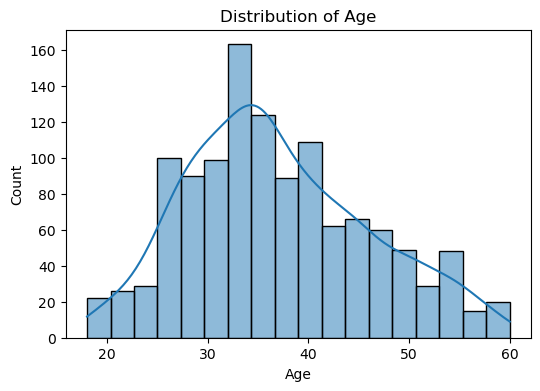

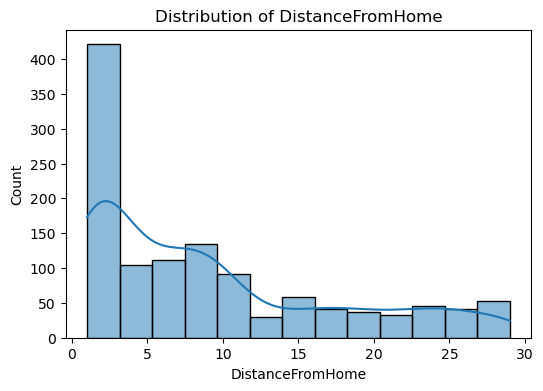

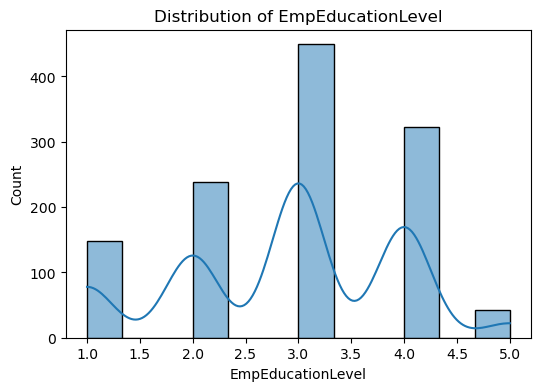

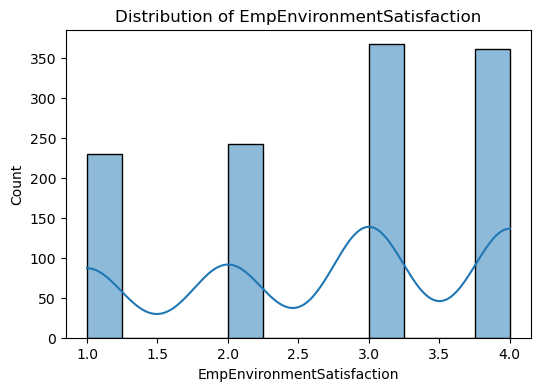

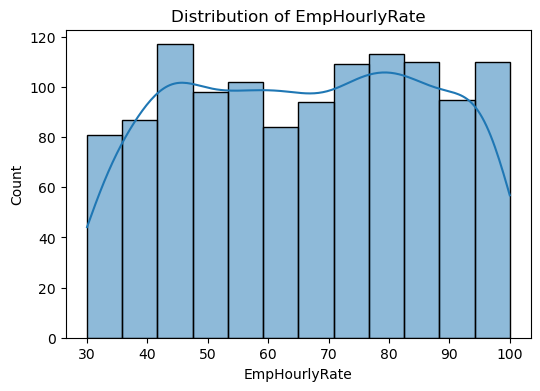

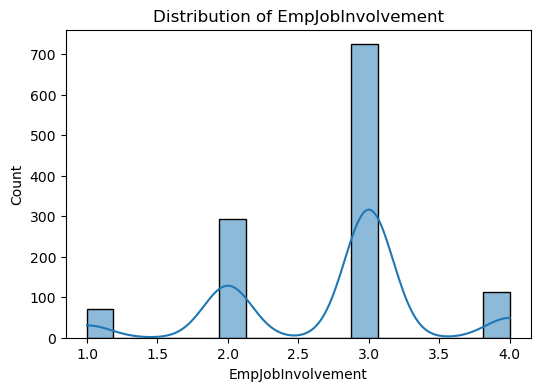

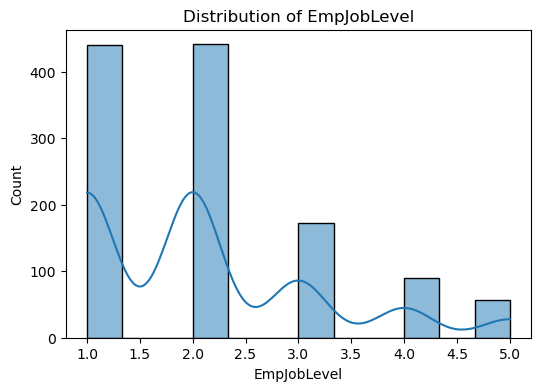

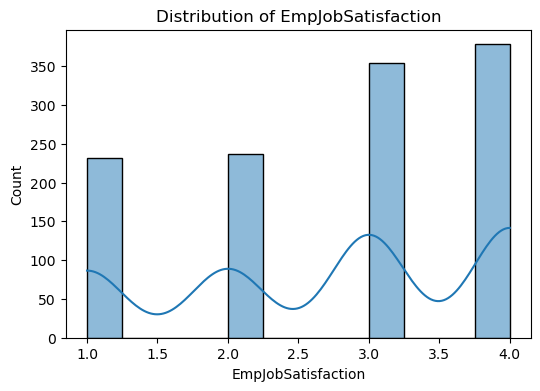

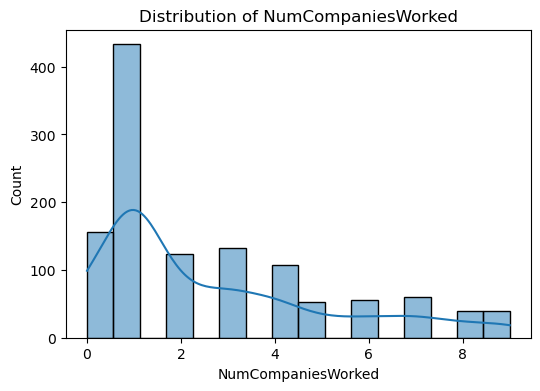

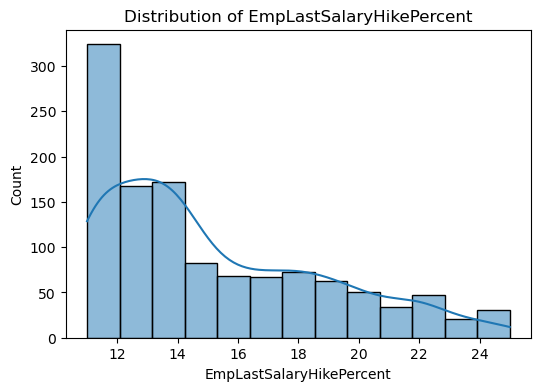

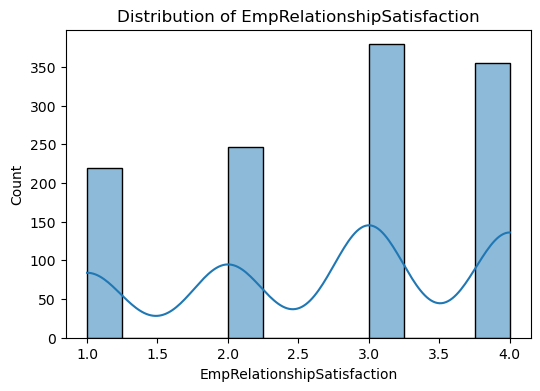

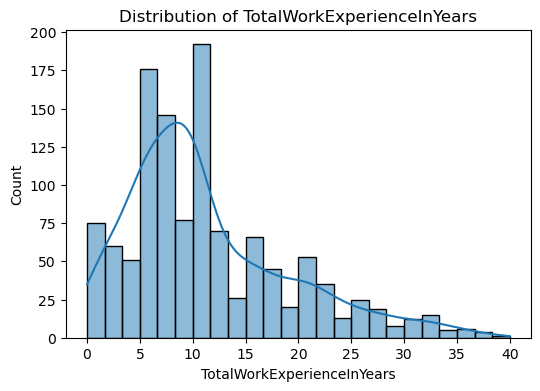

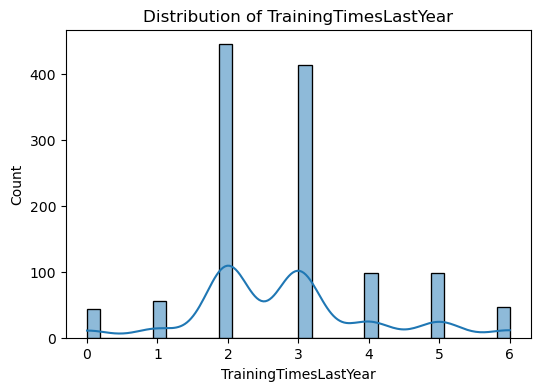

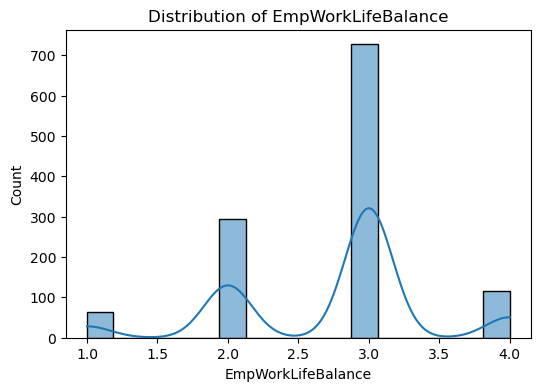

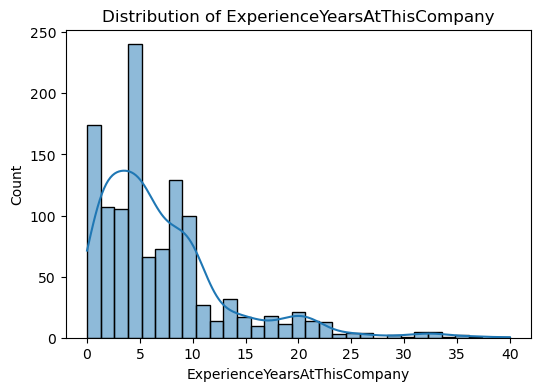

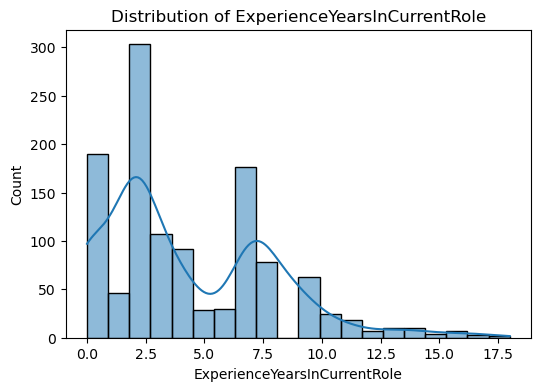

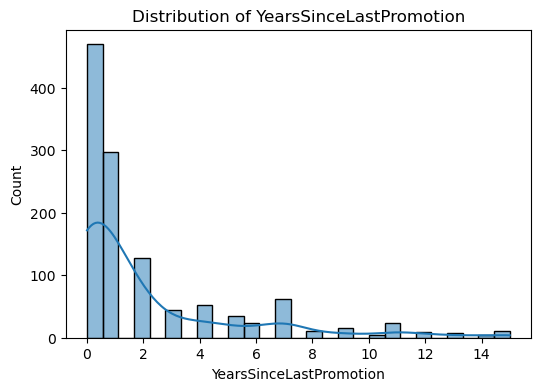

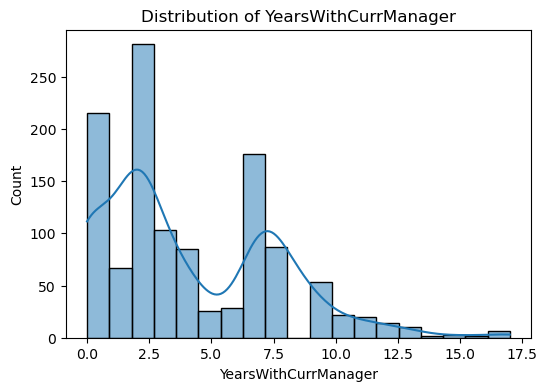

In [13]:
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

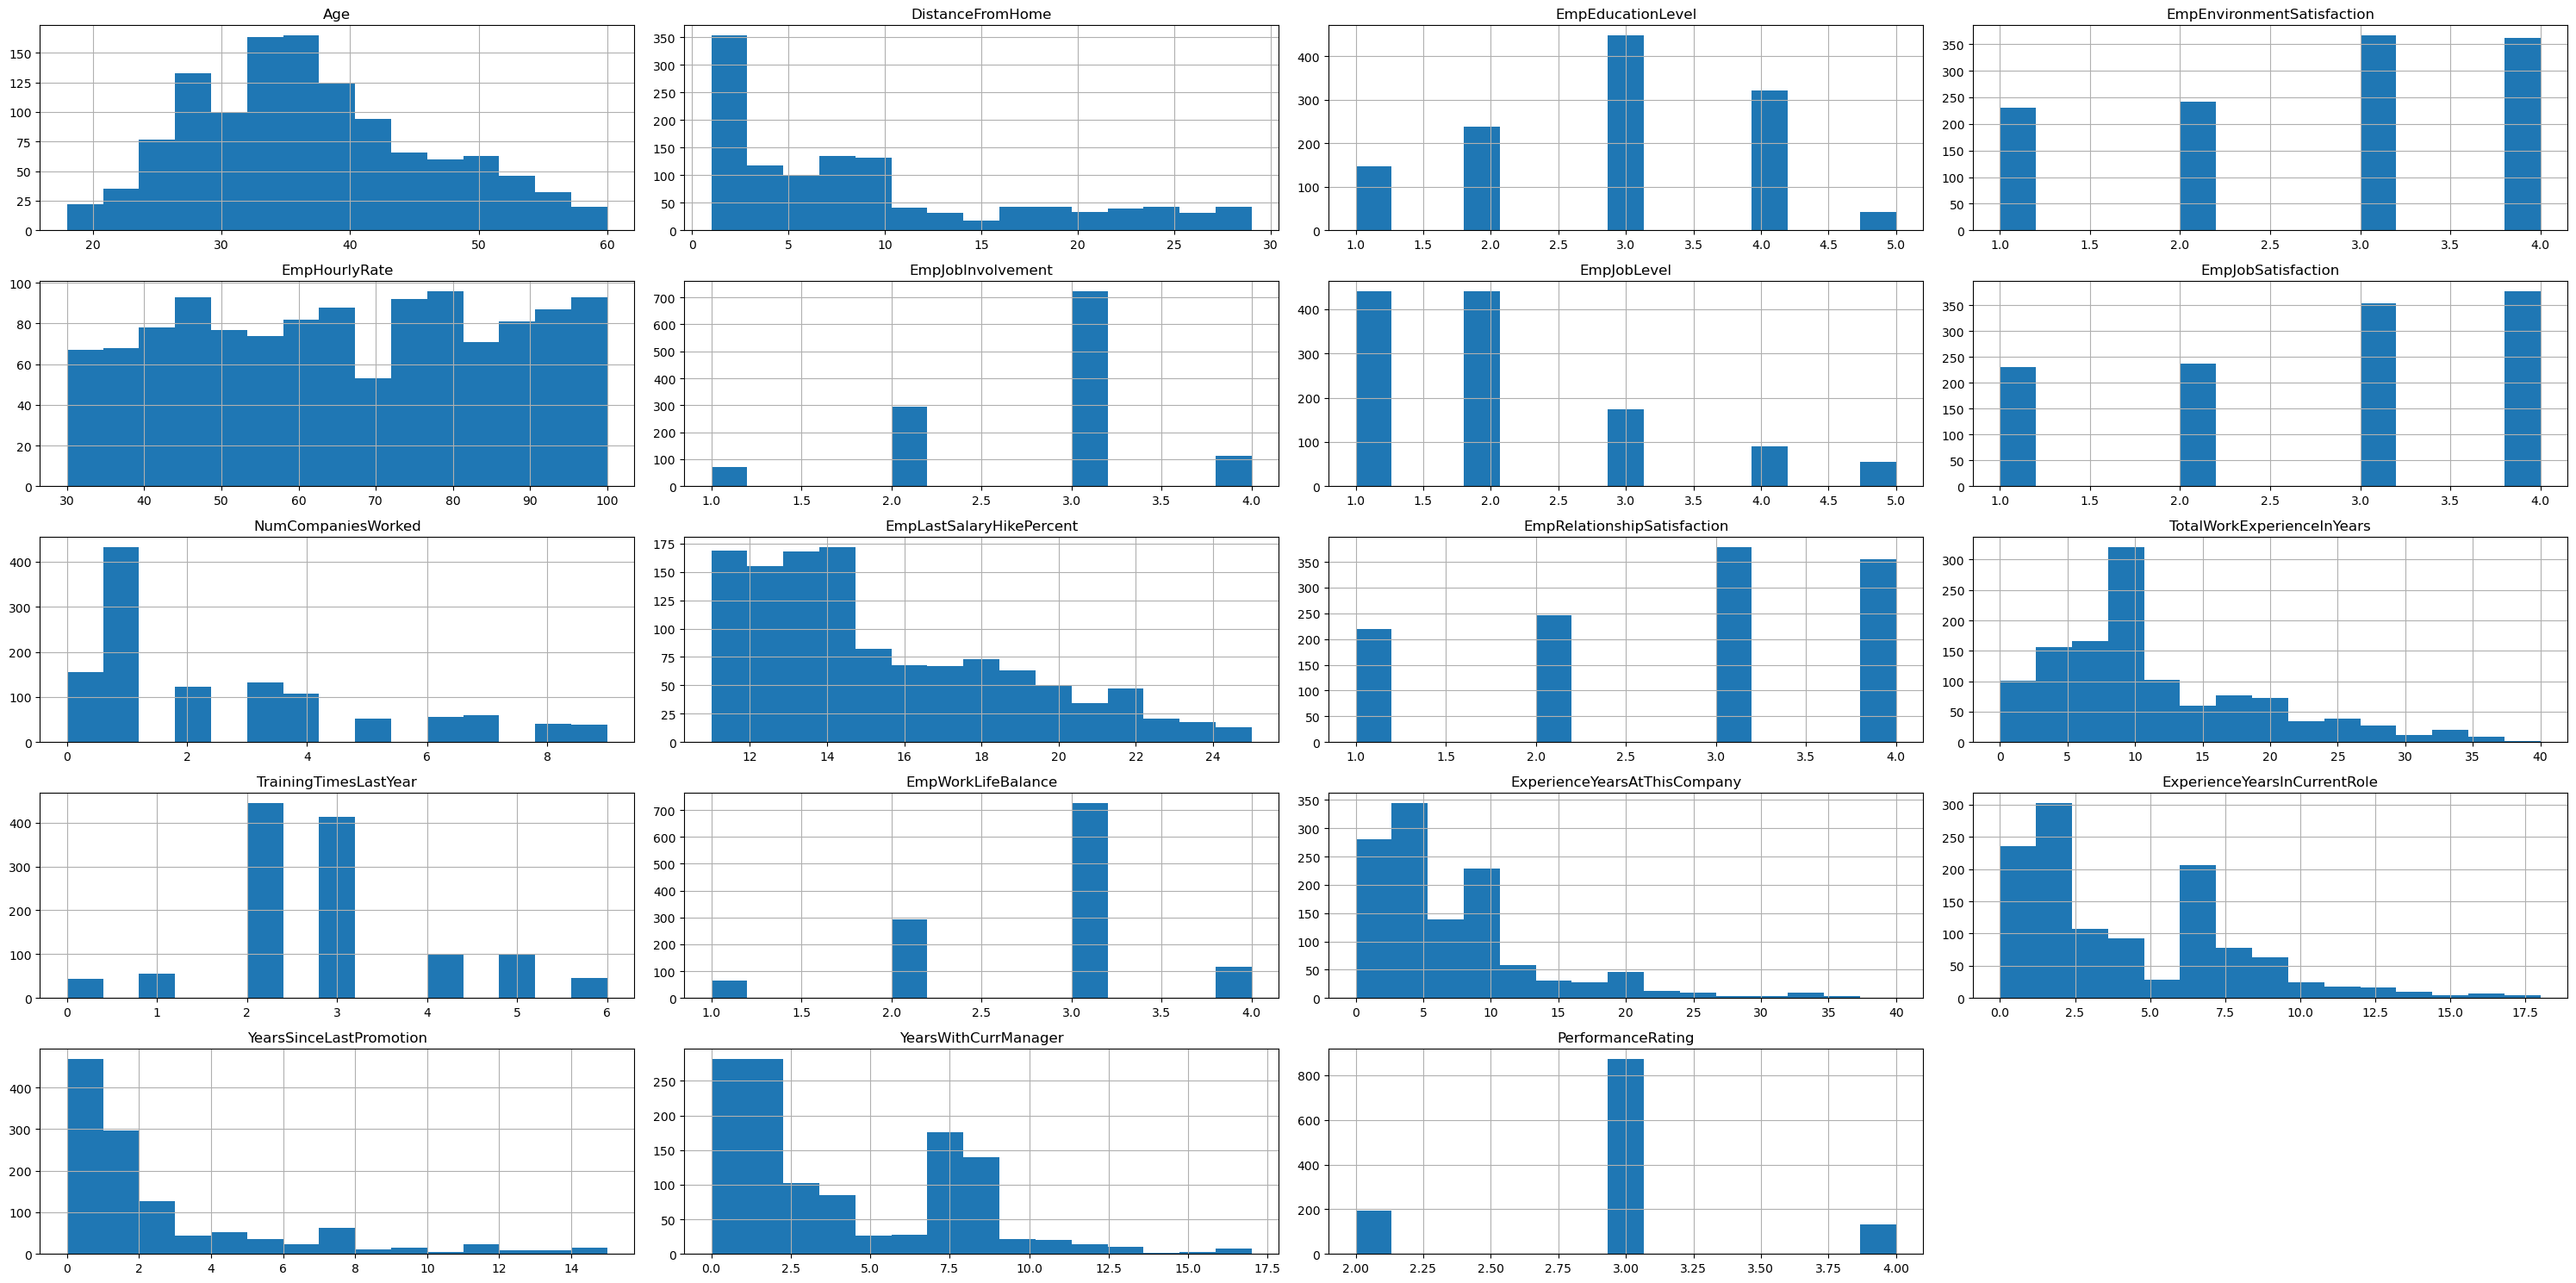

In [14]:
df.hist(bins=15,figsize=(30, 15))
plt.tight_layout()

###  Department-wise Performance (Average Rating)

 ⫸ Higher rating = better performing department.

DepartmentAvg Performance

1. Development( ⭐ 3.09 )
2. Data Science( ⭐ 3.05 )
3. Human Resources( 2.93 )
4. Research & Development( 2.92 )
5. Sales( 2.86 )
6. Finance	❗( 2.78 )(lowest)

Insight:

Development and Data Science departments are performing the best.
Finance is the lowest-performing department

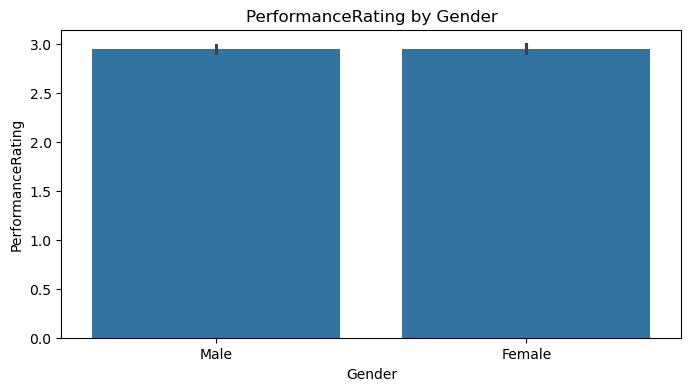

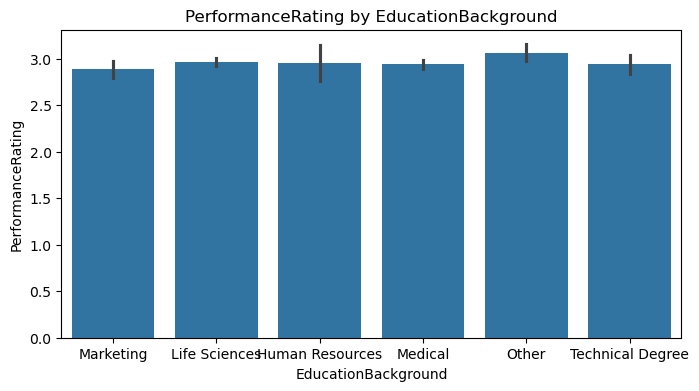

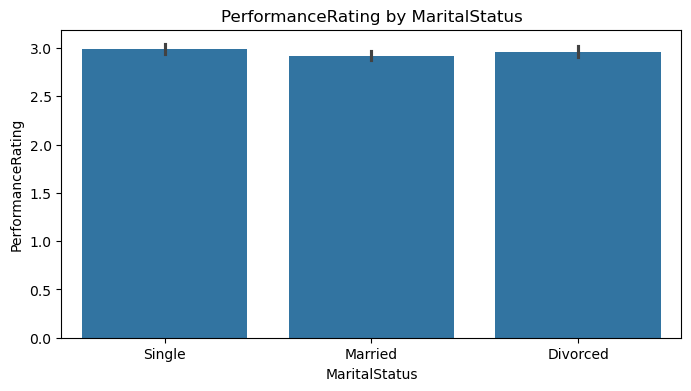

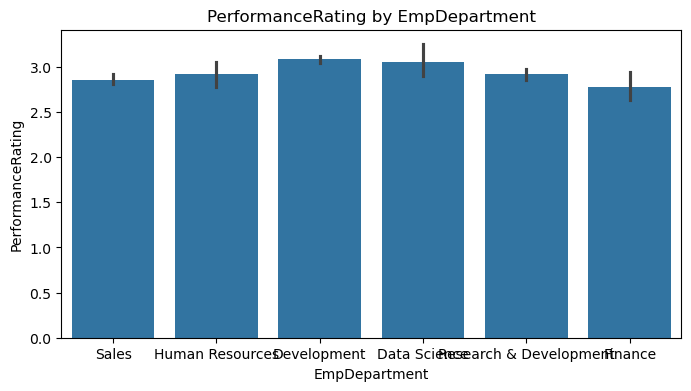

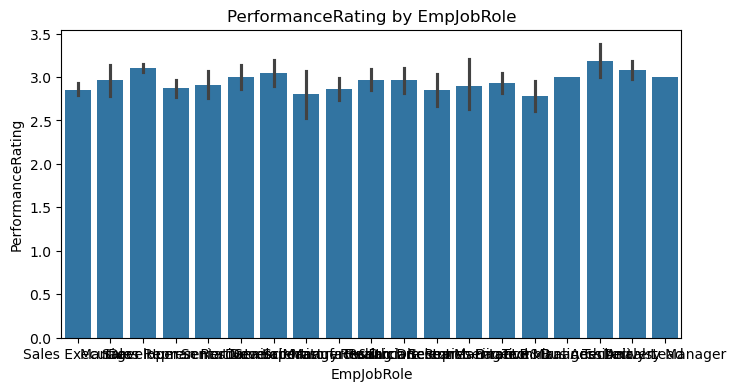

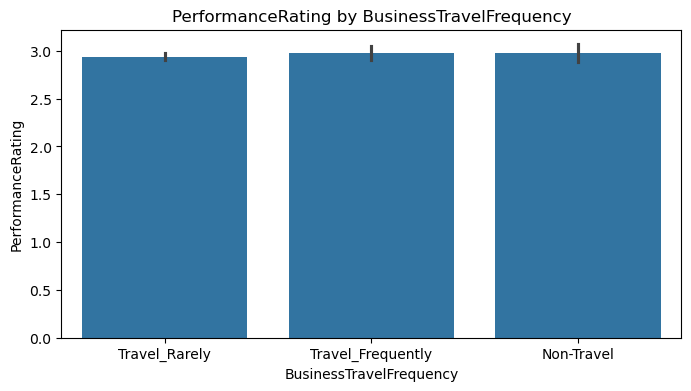

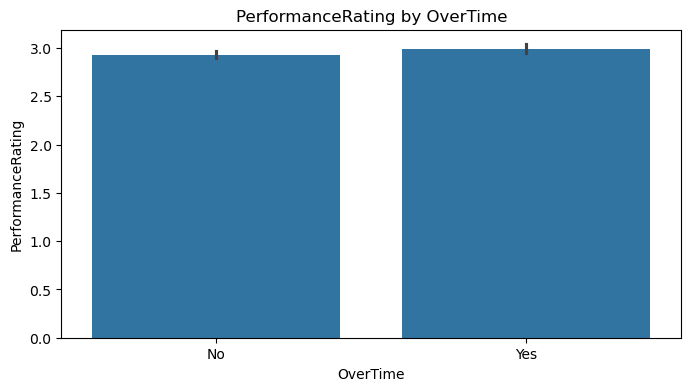

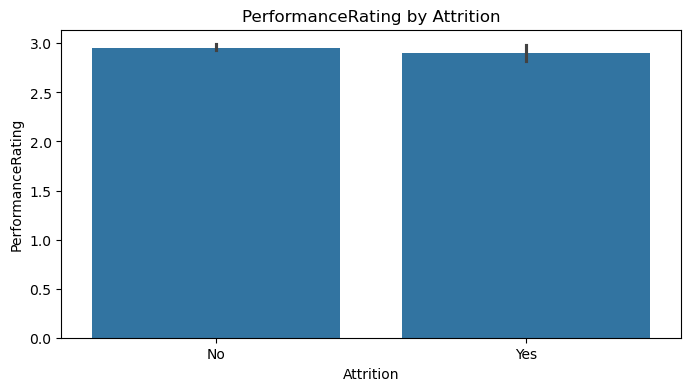

In [15]:
for col in cat_cols:
    plt.figure(figsize=(8,4))
    sns.barplot(x=col, y="PerformanceRating", data=df)
    plt.title(f"PerformanceRating by {col}")
    plt.show()

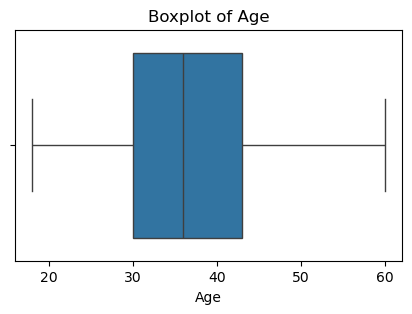

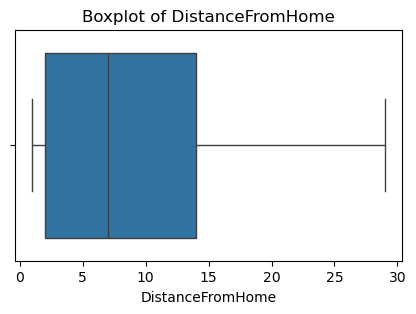

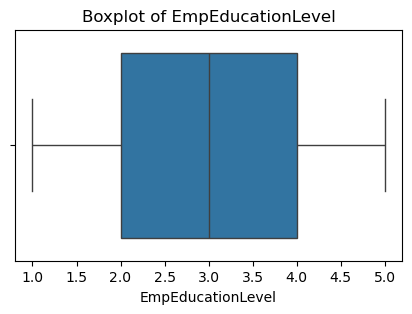

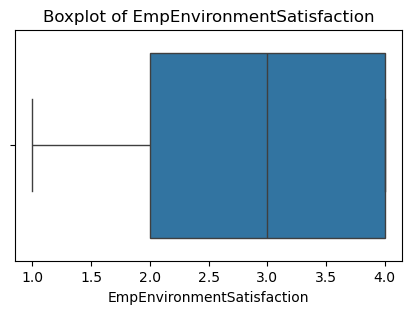

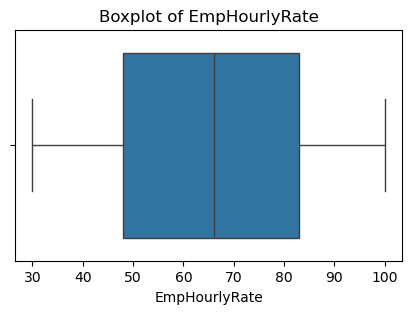

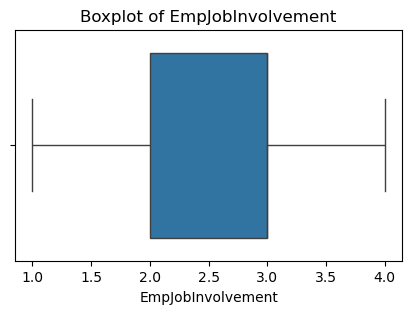

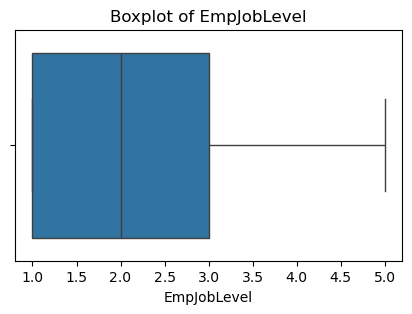

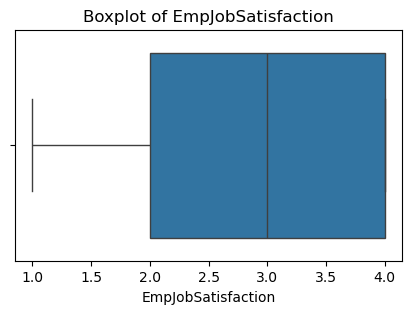

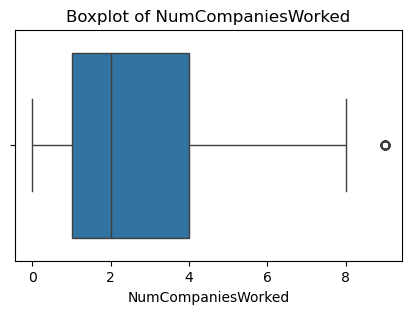

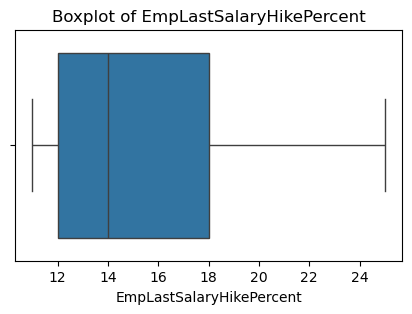

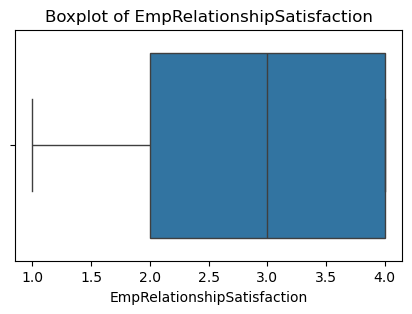

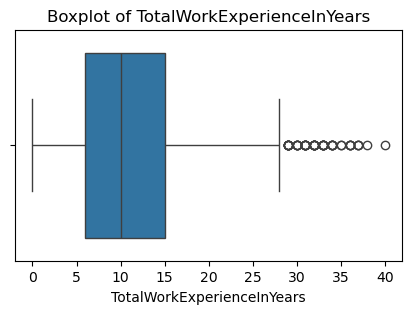

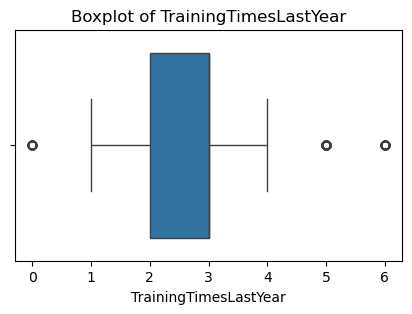

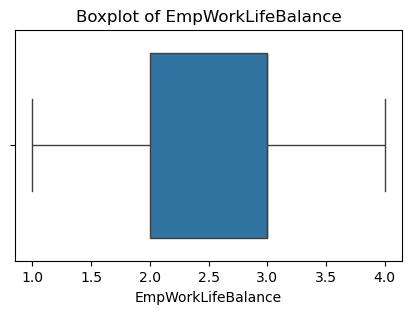

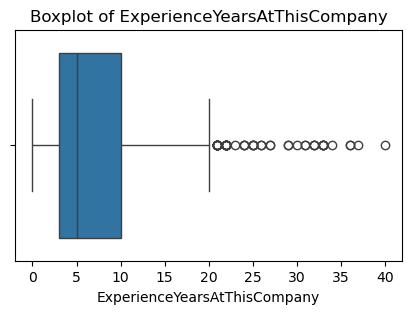

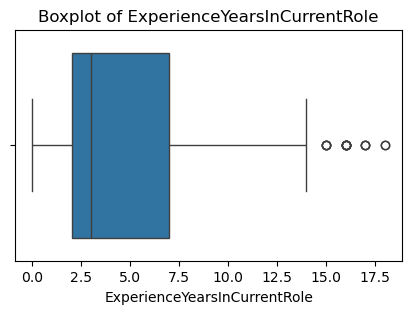

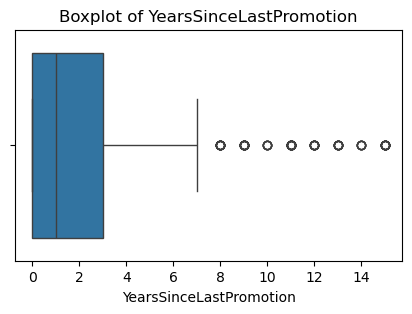

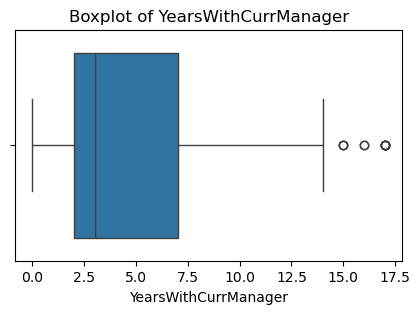

In [16]:
for col in num_cols:
    plt.figure(figsize=(5,3))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

### Top 3 Most Important Factors Affecting Performance

Using correlations with PerformanceRating:

1️⃣ EmpEnvironmentSatisfaction

    Employees with higher satisfaction perform significantly better.

2️⃣ EmpLastSalaryHikePercent

    Employees who received higher salary hikes tend to have higher performance.

3️⃣ EmpWorkLifeBalance

    Better balance → better performance.

<Axes: >

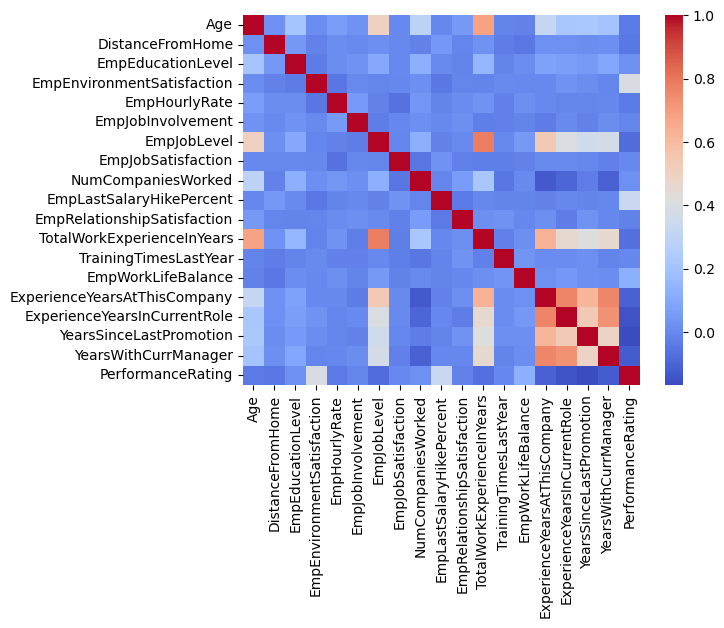

In [17]:
sns.heatmap(df.corr(numeric_only=True), cmap="coolwarm")

## Data Cleaning & Preprocessing

1. Handled missing values

2. Encoded categorical features

3. Standardized numerical variables

4. Removed non-informative ID columns

In [18]:
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] > upper_limit, upper_limit,np.where(df[col] < lower_limit, lower_limit, df[col]))

In [19]:
for i in cat_cols:
    print(df[i].value_counts())
    print("\n")

Gender
Male      725
Female    475
Name: count, dtype: int64


EducationBackground
Life Sciences       492
Medical             384
Marketing           137
Technical Degree    100
Other                66
Human Resources      21
Name: count, dtype: int64


MaritalStatus
Married     548
Single      384
Divorced    268
Name: count, dtype: int64


EmpDepartment
Sales                     373
Development               361
Research & Development    343
Human Resources            54
Finance                    49
Data Science               20
Name: count, dtype: int64


EmpJobRole
Sales Executive              270
Developer                    236
Manager R&D                   94
Research Scientist            77
Sales Representative          69
Laboratory Technician         64
Senior Developer              52
Manager                       51
Finance Manager               49
Human Resources               45
Technical Lead                38
Manufacturing Director        33
Healthcare Representative 

In [20]:
df.head(2)

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,32.0,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10.0,3.0,4.0,...,4.0,10.0,2.0,2.0,10.0,7.0,0.0,8.0,No,3
1,47.0,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14.0,4.0,4.0,...,4.0,20.0,2.0,3.0,7.0,7.0,1.0,7.0,No,3


In [21]:
nom_cols=['MaritalStatus','EmpDepartment','EmpJobRole',"Gender","EducationBackground","OverTime"]

In [22]:
ord_cols=["BusinessTravelFrequency",]

In [23]:
ordinal_order = [['Non-Travel', 'Travel_Rarely', 'Travel_Frequently']]

In [24]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler,LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
le = LabelEncoder()

In [25]:
le.fit_transform(df["Attrition"])

array([0, 0, 0, ..., 0, 0, 1])

In [26]:
numeric_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy='median')),
    ("scaler", StandardScaler())
])

ordinal_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy='most_frequent')),
    ("ordinal", OrdinalEncoder(categories=ordinal_order))
])

nominal_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy='most_frequent')),
    ("onehot", OneHotEncoder(drop='first', handle_unknown='ignore'))
])

In [27]:
preprocessor = ColumnTransformer(
    transformers=[
        ("numeric", numeric_pipeline, num_cols),
        ("ordinal", ordinal_pipeline, ord_cols),
        ("nominal", nominal_pipeline, nom_cols)
    ]
)

In [28]:
preprocessor

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 Index(['Age', 'DistanceFromHome', 'EmpEducationLevel',
       'EmpEnvironmentSatisfaction', 'EmpHourlyRate', 'EmpJobInvolvement',
       'EmpJobLevel', 'EmpJobSatisfaction', 'NumCompaniesWorked',
       'EmpLastSalaryHikePercent', 'EmpRelationship...
                                                 ('ordinal',
                                                  OrdinalEncoder(categories=[['Non-Travel',
                                                                              'Travel_Rarely',
                                                                              'Travel_Frequently']]))]),
                                 ['BusinessTravelFrequency']),
                                ('nominal',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'))]),
                                 ['MaritalStatus', 'EmpDepartment',
                                  'EmpJobRole', 'Gender', 'EducationBackground',
                                  'OverTime'])])

In [29]:
X_transformed = preprocessor.fit_transform(FX)
feature_names = preprocessor.get_feature_names_out()
df_transformed = pd.DataFrame(X_transformed, columns=feature_names)

In [30]:
x=df_transformed

In [31]:
from sklearn.model_selection import train_test_split

### Predictive Model Insight (Simple Explanation)

A model predicting PerformanceRating would rely mainly on:

Environment Satisfaction

Salary Hike %

Work-life Balance

These factors provide the strongest signals for predicting high performance.

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [42]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [43]:
lr = LogisticRegression(max_iter=2000)

In [44]:
lr.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

In [45]:
from sklearn.model_selection import GridSearchCV

In [46]:
param_grid = { 
    "C": [0.01, 0.1, 1, 10, 100],   # Regularization strength 
    "penalty": ["l2"],              # Penalty type 
    "solver": ["lbfgs", "saga"]     # Solvers compatible with l2
}

In [47]:
grid_search = GridSearchCV(
    estimator=lr,
    param_grid=param_grid, 
    cv=5,
    scoring="accuracy",
    n_jobs=-1 )

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=2000), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l2'],
                         'solver': ['lbfgs', 'saga']},
             scoring='accuracy')

In [48]:
print("Best Parameters:", grid_search.best_params_)
print("Best CV Accuracy:", grid_search.best_score_) 

Best Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
Best CV Accuracy: 0.809375


In [49]:
best_model = grid_search.best_estimator_
y_pred_lr = best_model.predict(X_test)

print("accuracy score:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))

accuracy score: 0.8291666666666667
Classification Report:
               precision    recall  f1-score   support

           2       0.69      0.46      0.55        39
           3       0.85      0.95      0.90       175
           4       0.82      0.54      0.65        26

    accuracy                           0.83       240
   macro avg       0.79      0.65      0.70       240
weighted avg       0.82      0.83      0.82       240



In [50]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [51]:
param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 5, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

In [52]:
grid_search = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [53]:
print("Best Parameters:", grid_search.best_params_)
print("Best CV Accuracy:", grid_search.best_score_)

Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best CV Accuracy: 0.9177083333333333


In [54]:

best_model = grid_search.best_estimator_
y_pred_dt = best_model.predict(X_test)

print( "Accuracy score:", accuracy_score(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))

Accuracy score: 0.9375
Classification Report:
               precision    recall  f1-score   support

           2       0.89      0.85      0.87        39
           3       0.94      0.98      0.96       175
           4       1.00      0.77      0.87        26

    accuracy                           0.94       240
   macro avg       0.94      0.87      0.90       240
weighted avg       0.94      0.94      0.94       240



In [55]:
RFC=RandomForestClassifier()
RFC.fit(X_train,y_train)

RandomForestClassifier()

In [56]:
param_grid = {
    "n_estimators": [100, 200, 300],       # number of trees
    "max_depth": [None, 10, 20],           # tree depth
    "min_samples_split": [2, 5],           # min samples to split
    "min_samples_leaf": [1, 2],            # min samples per leaf
    "criterion": ["gini", "entropy"]       # splitting criterion
}

In [57]:
grid_search = GridSearchCV(
    estimator=RFC,
    param_grid=param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [58]:
print("Best Parameters:", grid_search.best_params_)
print("Best CV Accuracy:", grid_search.best_score_)

Best Parameters: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best CV Accuracy: 0.9239583333333334


In [59]:
best_model = grid_search.best_estimator_
y_pred_rfc = best_model.predict(X_test)

print("Accuracy score:", accuracy_score(y_test, y_pred_rfc))
print("Classification Report:\n", classification_report(y_test, y_pred_rfc))

Accuracy score: 0.9208333333333333
Classification Report:
               precision    recall  f1-score   support

           2       0.91      0.79      0.85        39
           3       0.91      0.98      0.95       175
           4       1.00      0.69      0.82        26

    accuracy                           0.92       240
   macro avg       0.94      0.82      0.87       240
weighted avg       0.92      0.92      0.92       240



In [60]:
y_train = y_train - y_train.min()
y_test = y_test - y_test.min()
xgb=XGBClassifier(n_estimators=10)
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=10,
              n_jobs=None, num_parallel_tree=None, ...)

In [61]:
param_grid = {
    "n_estimators": [100, 200, 300],       # number of boosting rounds
    "max_depth": [3, 5, 7],                # depth of trees
    "learning_rate": [0.01, 0.1, 0.2],     # step size shrinkage
    "subsample": [0.8, 1.0],               # fraction of samples per tree
    "colsample_bytree": [0.8, 1.0]         # fraction of features per tree
}

In [62]:
xgb = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

xgb.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=Non...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=10,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 1.0]},
             scoring='accuracy')

In [63]:
print("Best Parameters:", xgb.best_params_)
print("Best CV Accuracy:", xgb.best_score_)

Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200, 'subsample': 1.0}
Best CV Accuracy: 0.9364583333333334


In [64]:
best_model = xgb.best_estimator_
y_pred_xgb = best_model.predict(X_test)

print("Accuracy score:", accuracy_score(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))

Accuracy score: 0.9375
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.85      0.88        39
           1       0.93      0.98      0.96       175
           2       1.00      0.77      0.87        26

    accuracy                           0.94       240
   macro avg       0.95      0.87      0.90       240
weighted avg       0.94      0.94      0.94       240



In [65]:
svm = SVC(random_state=42,class_weight="balanced")
svm.fit(X_train,y_train)

SVC(class_weight='balanced', random_state=42)

In [66]:

param_grid = {
    "kernel": ["linear", "rbf"],   # kernel types
    "C": [0.1, 1, 10, 50],                     # regularization parameter
    "gamma": [0.001, 0.01, 0.1, 1, "scale"]    # kernel coefficient
}

In [67]:
svm= GridSearchCV(
    estimator=svm,
    param_grid=param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
    verbose=0
)

svm.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=SVC(class_weight='balanced', random_state=42),
             n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 50],
                         'gamma': [0.001, 0.01, 0.1, 1, 'scale'],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [68]:
print("Best Parameters :", svm.best_params_)
print("Best CV Accuracy:", svm.best_score_)

Best Parameters : {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best CV Accuracy: 0.8052083333333332


In [69]:
best_model = svm.best_estimator_
y_pred_svm = best_model.predict(X_test)

print("Accuracy score:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))

Accuracy score: 0.8208333333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.49      0.57        39
           1       0.85      0.93      0.89       175
           2       0.71      0.58      0.64        26

    accuracy                           0.82       240
   macro avg       0.75      0.67      0.70       240
weighted avg       0.81      0.82      0.81       240



## Key Insights From the Dataset
1. Best Performing Departments

        Development

        Data Science

2. Low Performing Department

        Finance

3. Top 3 Factors Affecting Performance

        Environment Satisfaction

        Last Salary Hike Percentage

        Work-Life Balance

4.  Model Outcome

   The final model predicts performance rating with high accuracy and can be used during:

    hiring

    promotion evaluation

    performance forecasting

### Recommendations to Improve Employee Performance
1️⃣ Improve Work Environment

    Address stress factors

    Improve team culture

    Provide better workspace & tools
This boosts Environment Satisfaction — your #1 performance driver.

2️⃣ Reward High Performers With Meaningful Salary Hikes

    Use performance-linked increments

    Ensure fair & transparent appraisal cycles
This directly improves performance (#2 factor).

3️⃣ Strengthen Work-Life Balance

    Encourage flexible work schedules

    Reduce excessive overtime
Employees with better balance show higher ratings.

4️⃣ Focus on Finance Department

    Since Finance has the lowest performance:

    Conduct skill gap analysis

    Provide training & mentoring

    Review workload distribution